In [69]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sympy as sp
import pyPI as pi

In [70]:
Er = np.array([[1], [0]])
Eis = np.array([[1], [2 * np.exp(1j * np.pi/4)]])
#Eis = np.array([[1], [1]])

delta_chi = np.pi
alpha = 0

#S = np.array([[1, 0], 
#                   [0, np.exp(1j * delta_chi)]])
sxx = (np.cos(alpha) ** 2 + np.exp(-1j * delta_chi) * np.sin(alpha) ** 2) * np.abs(Eis[0,0])
sxy = ((1 - np.exp(1j * delta_chi)) * np.cos(alpha) * np.sin(alpha)) * np.abs(Eis[1,0]) * np.exp(1j * np.angle(Eis[1,0]))
syx = ((1 - np.exp(1j * delta_chi)) * np.cos(alpha) * np.sin(alpha)) * np.abs(Eis[0,0])
syy = (np.sin(alpha) ** 2 + np.exp(-1j * delta_chi) * np.cos(alpha) ** 2) * np.abs(Eis[1,0])

S = np.array([[sxx, sxy], 
                   [syx, syy]])

Es = S @ Eis

delta_phi_s = np.angle(Es[1,0]) - np.angle(Es[0,0])

delta_chi_calculated = np.abs(delta_phi_s - np.angle(Eis[1,0]))


print(f"S: {S}")
print(f"Es: {Es}")
print(f"Esx: {np.abs(Es[0])[0]}")
print(f"Esy: {np.abs(Es[1])[0]}")
print(f"Delta_phi_s_x: {np.angle(Es[0,0])}")
print(f"Delta_phi_s_y: {np.angle(Es[1,0])}")
print(f"Delta_phi_s: {delta_phi_s}")
print(f"Delta_phi_is: {np.angle(Eis[1,0])}")
print(f"Delta_chi: {delta_chi}")
print(f"Delta_chi_calculates: {delta_chi_calculated}")

S: [[ 1.+0.0000000e+00j  0.+0.0000000e+00j]
 [ 0.+0.0000000e+00j -2.-2.4492936e-16j]]
Es: [[ 1.        +0.j        ]
 [-2.82842712-2.82842712j]]
Esx: 1.0
Esy: 4.000000000000001
Delta_phi_s_x: 0.0
Delta_phi_s_y: -2.356194490192345
Delta_phi_s: -2.356194490192345
Delta_phi_is: 0.7853981633974483
Delta_chi: 3.141592653589793
Delta_chi_calculates: 3.141592653589793


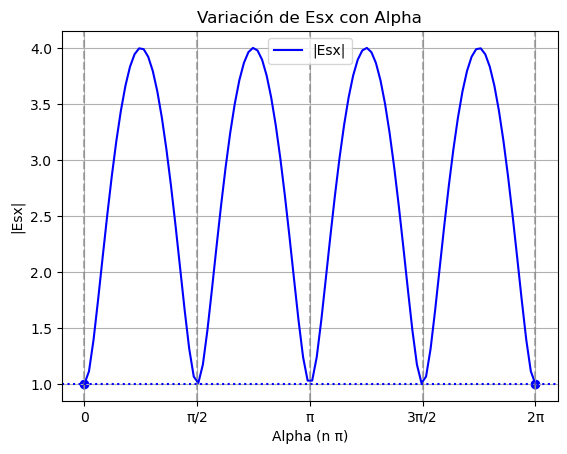

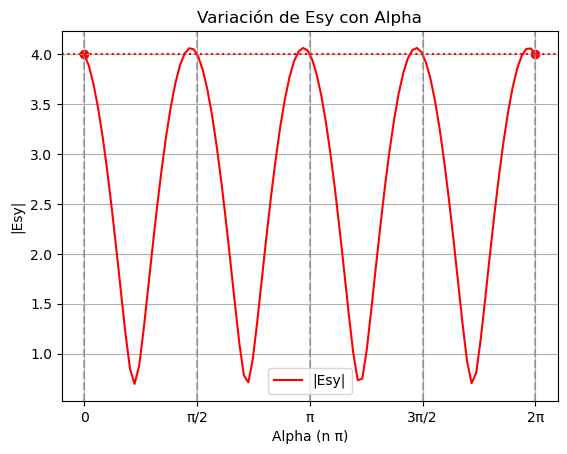

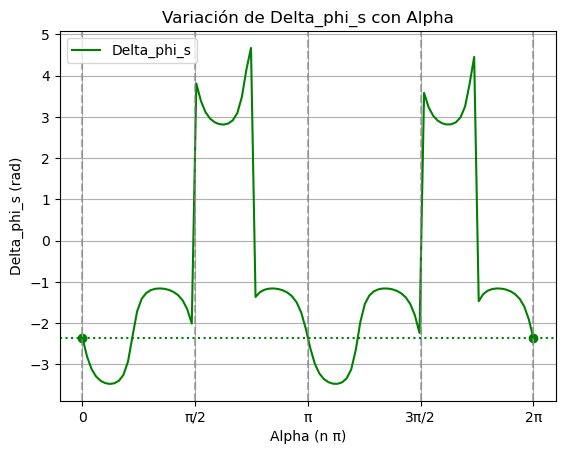

   Alpha (rad)  |Esx|  |Esy|  Delta_phi_s
0     0.000000    1.0    4.0    -2.356194
1     6.283185    1.0    4.0    -2.356194


In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_es_variation(Eis, delta_chi):
    alpha_values = np.linspace(0, 2 * np.pi, 100)
    Esx_values = []
    Esy_values = []
    delta_phi_s_values = []
    
    key_alphas = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
    key_values = []
    
    for alpha in alpha_values:
        sxx = (np.cos(alpha) ** 2 + np.exp(-1j * delta_chi) * np.sin(alpha) ** 2) * np.abs(Eis[0,0])
        sxy = ((1 - np.exp(1j * delta_chi)) * np.cos(alpha) * np.sin(alpha)) * np.abs(Eis[1,0]) * np.exp(1j * np.angle(Eis[1,0]))
        syx = ((1 - np.exp(1j * delta_chi)) * np.cos(alpha) * np.sin(alpha)) * np.abs(Eis[0,0])
        syy = (np.sin(alpha) ** 2 + np.exp(-1j * delta_chi) * np.cos(alpha) ** 2) * np.abs(Eis[1,0])
        
        S = np.array([[sxx, sxy], 
                      [syx, syy]])
        
        Es = S @ Eis
        delta_phi_s = np.angle(Es[1,0]) - np.angle(Es[0,0])
        
        Esx_values.append(np.abs(Es[0])[0])
        Esy_values.append(np.abs(Es[1])[0])
        delta_phi_s_values.append(delta_phi_s)
        
        if alpha in key_alphas:
            key_values.append((alpha, np.abs(Es[0])[0], np.abs(Es[1])[0], delta_phi_s))
    
    # Líneas de referencia
    def plot_reference_lines():
        for alpha in key_alphas:
            plt.axvline(x=alpha, color='gray', linestyle='--', alpha=0.6)
    
    # Gráfica de Esx
    plt.figure()
    plt.plot(alpha_values, Esx_values, label='|Esx|', color='b')
    plot_reference_lines()
    Esx_0 = key_values[0][1]  # Valor de Esx cuando alpha = 0
    plt.axhline(y=Esx_0, color='b', linestyle='dotted')
    for alpha, Esx, _, _ in key_values:
        plt.scatter(alpha, Esx, color='b')
    plt.xlabel('Alpha (n π)')
    plt.xticks(key_alphas, ['0', 'π/2', 'π', '3π/2', '2π'])
    plt.ylabel('|Esx|')
    plt.title('Variación de Esx con Alpha')
    plt.grid()
    plt.legend()
    plt.show()
    
    # Gráfica de Esy
    plt.figure()
    plt.plot(alpha_values, Esy_values, label='|Esy|', color='r')
    plot_reference_lines()
    Esy_0 = key_values[0][2]  # Valor de Esy cuando alpha = 0
    plt.axhline(y=Esy_0, color='r', linestyle='dotted')
    for alpha, _, Esy, _ in key_values:
        plt.scatter(alpha, Esy, color='r')
    plt.xlabel('Alpha (n π)')
    plt.xticks(key_alphas, ['0', 'π/2', 'π', '3π/2', '2π'])
    plt.ylabel('|Esy|')
    plt.title('Variación de Esy con Alpha')
    plt.grid()
    plt.legend()
    plt.show()
    
    # Gráfica de delta_phi_s
    plt.figure()
    plt.plot(alpha_values, delta_phi_s_values, label='Delta_phi_s', color='g')
    plot_reference_lines()
    delta_phi_0 = key_values[0][3]  # Valor de Delta_phi_s cuando alpha = 0
    plt.axhline(y=delta_phi_0, color='g', linestyle='dotted')
    for alpha, _, _, delta_phi_s in key_values:
        plt.scatter(alpha, delta_phi_s, color='g')
    plt.xlabel('Alpha (n π)')
    plt.xticks(key_alphas, ['0', 'π/2', 'π', '3π/2', '2π'])
    plt.ylabel('Delta_phi_s (rad)')
    plt.title('Variación de Delta_phi_s con Alpha')
    plt.grid()
    plt.legend()
    plt.show()
    
    # Crear tabla con valores clave
    df = pd.DataFrame(key_values, columns=['Alpha (rad)', '|Esx|', '|Esy|', 'Delta_phi_s'])
    print(df)

plot_es_variation(Eis, delta_chi)
